### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# EDA - Índice de Churn

- Este notebook compreende apenas a analise exploratoria dos dados(visualizacoes, resumos estatisticos, entre outros)

In [8]:
# IMPORT DAS BIBLIOTECAS

from libraries import *
from funcoes_churn import *

In [9]:
# READING DATA

data_churn = pd.read_csv('../dataRaw/customer_churn.csv')

In [10]:
data_churn.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No


In [11]:
# checking datatypes

data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [12]:
data_churn.drop(columns = ['customerID'], inplace=True)

In [13]:
data_churn_ = data_churn.copy()
data_churn_ = Tratamento.alteraTipoDado(data_churn_, columns = ['TotalCharges', 'MonthlyCharges'])

In [15]:

data_churn_ = Tratamento.fillNa(data_churn_, column = 'TotalCharges')
data_churn_ = Tratamento.alteraValores(df = data_churn_
                               ,columns = ['MultipleLines'
                                           ,'OnlineSecurity'
                                           ,'OnlineBackup'
                                           ,'DeviceProtection'
                                           ,'TechSupport'
                                           ,'StreamingTV'
                                           ,'StreamingMovies'
                                           ]
                               ,dictToMap = {'No internet service': 'No'
                                            ,'No phone service': 'No'})

data_churn_ = Tratamento.alteraValores(df = data_churn_
                               ,columns = ['gender'                                            
                                            , 'Partner'
                                            , 'Dependents'                                                   
                                            , 'PhoneService'
                                            , 'MultipleLines'
                                            , 'InternetService'
                                            , 'OnlineSecurity'
                                            , 'OnlineBackup'
                                            , 'DeviceProtection'
                                            , 'TechSupport'
                                            , 'StreamingTV'
                                            , 'StreamingMovies'
                                            ,'PaperlessBilling'
                                            ,'Churn'
                                           ]
                               ,dictToMap = {'No': '0'
                                            ,'Yes': '1'})

data_churn_ = Tratamento.replaceCharacters(df = data_churn_)

In [16]:
data_churn_.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,1,72,1,1,Fiber_optic,1,1,1,1,1,1,Two_year,1,Bank_transfer__automatic,118.75,8672.45,0
1,Female,0,0,0,71,1,1,Fiber_optic,1,1,1,1,1,1,Two_year,1,Electronic_check,118.65,8477.60,0
2,Female,0,1,0,68,1,1,Fiber_optic,1,1,1,1,1,1,Two_year,0,Mailed_check,118.60,7990.05,0
3,Female,0,0,0,61,1,1,Fiber_optic,1,1,1,1,1,1,One_year,1,Electronic_check,118.60,7365.70,0
4,Male,0,0,0,67,1,1,Fiber_optic,1,1,1,1,1,1,One_year,1,Bank_transfer__automatic,118.35,7804.15,1


In [17]:
# checking unique values for each column

data_churn_.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
data_churn_.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

___________________________

In [19]:
data_churn_categorica = data_churn_.drop(columns = ['tenure'
                                                    ,'MonthlyCharges'
                                                    ,'TotalCharges'])

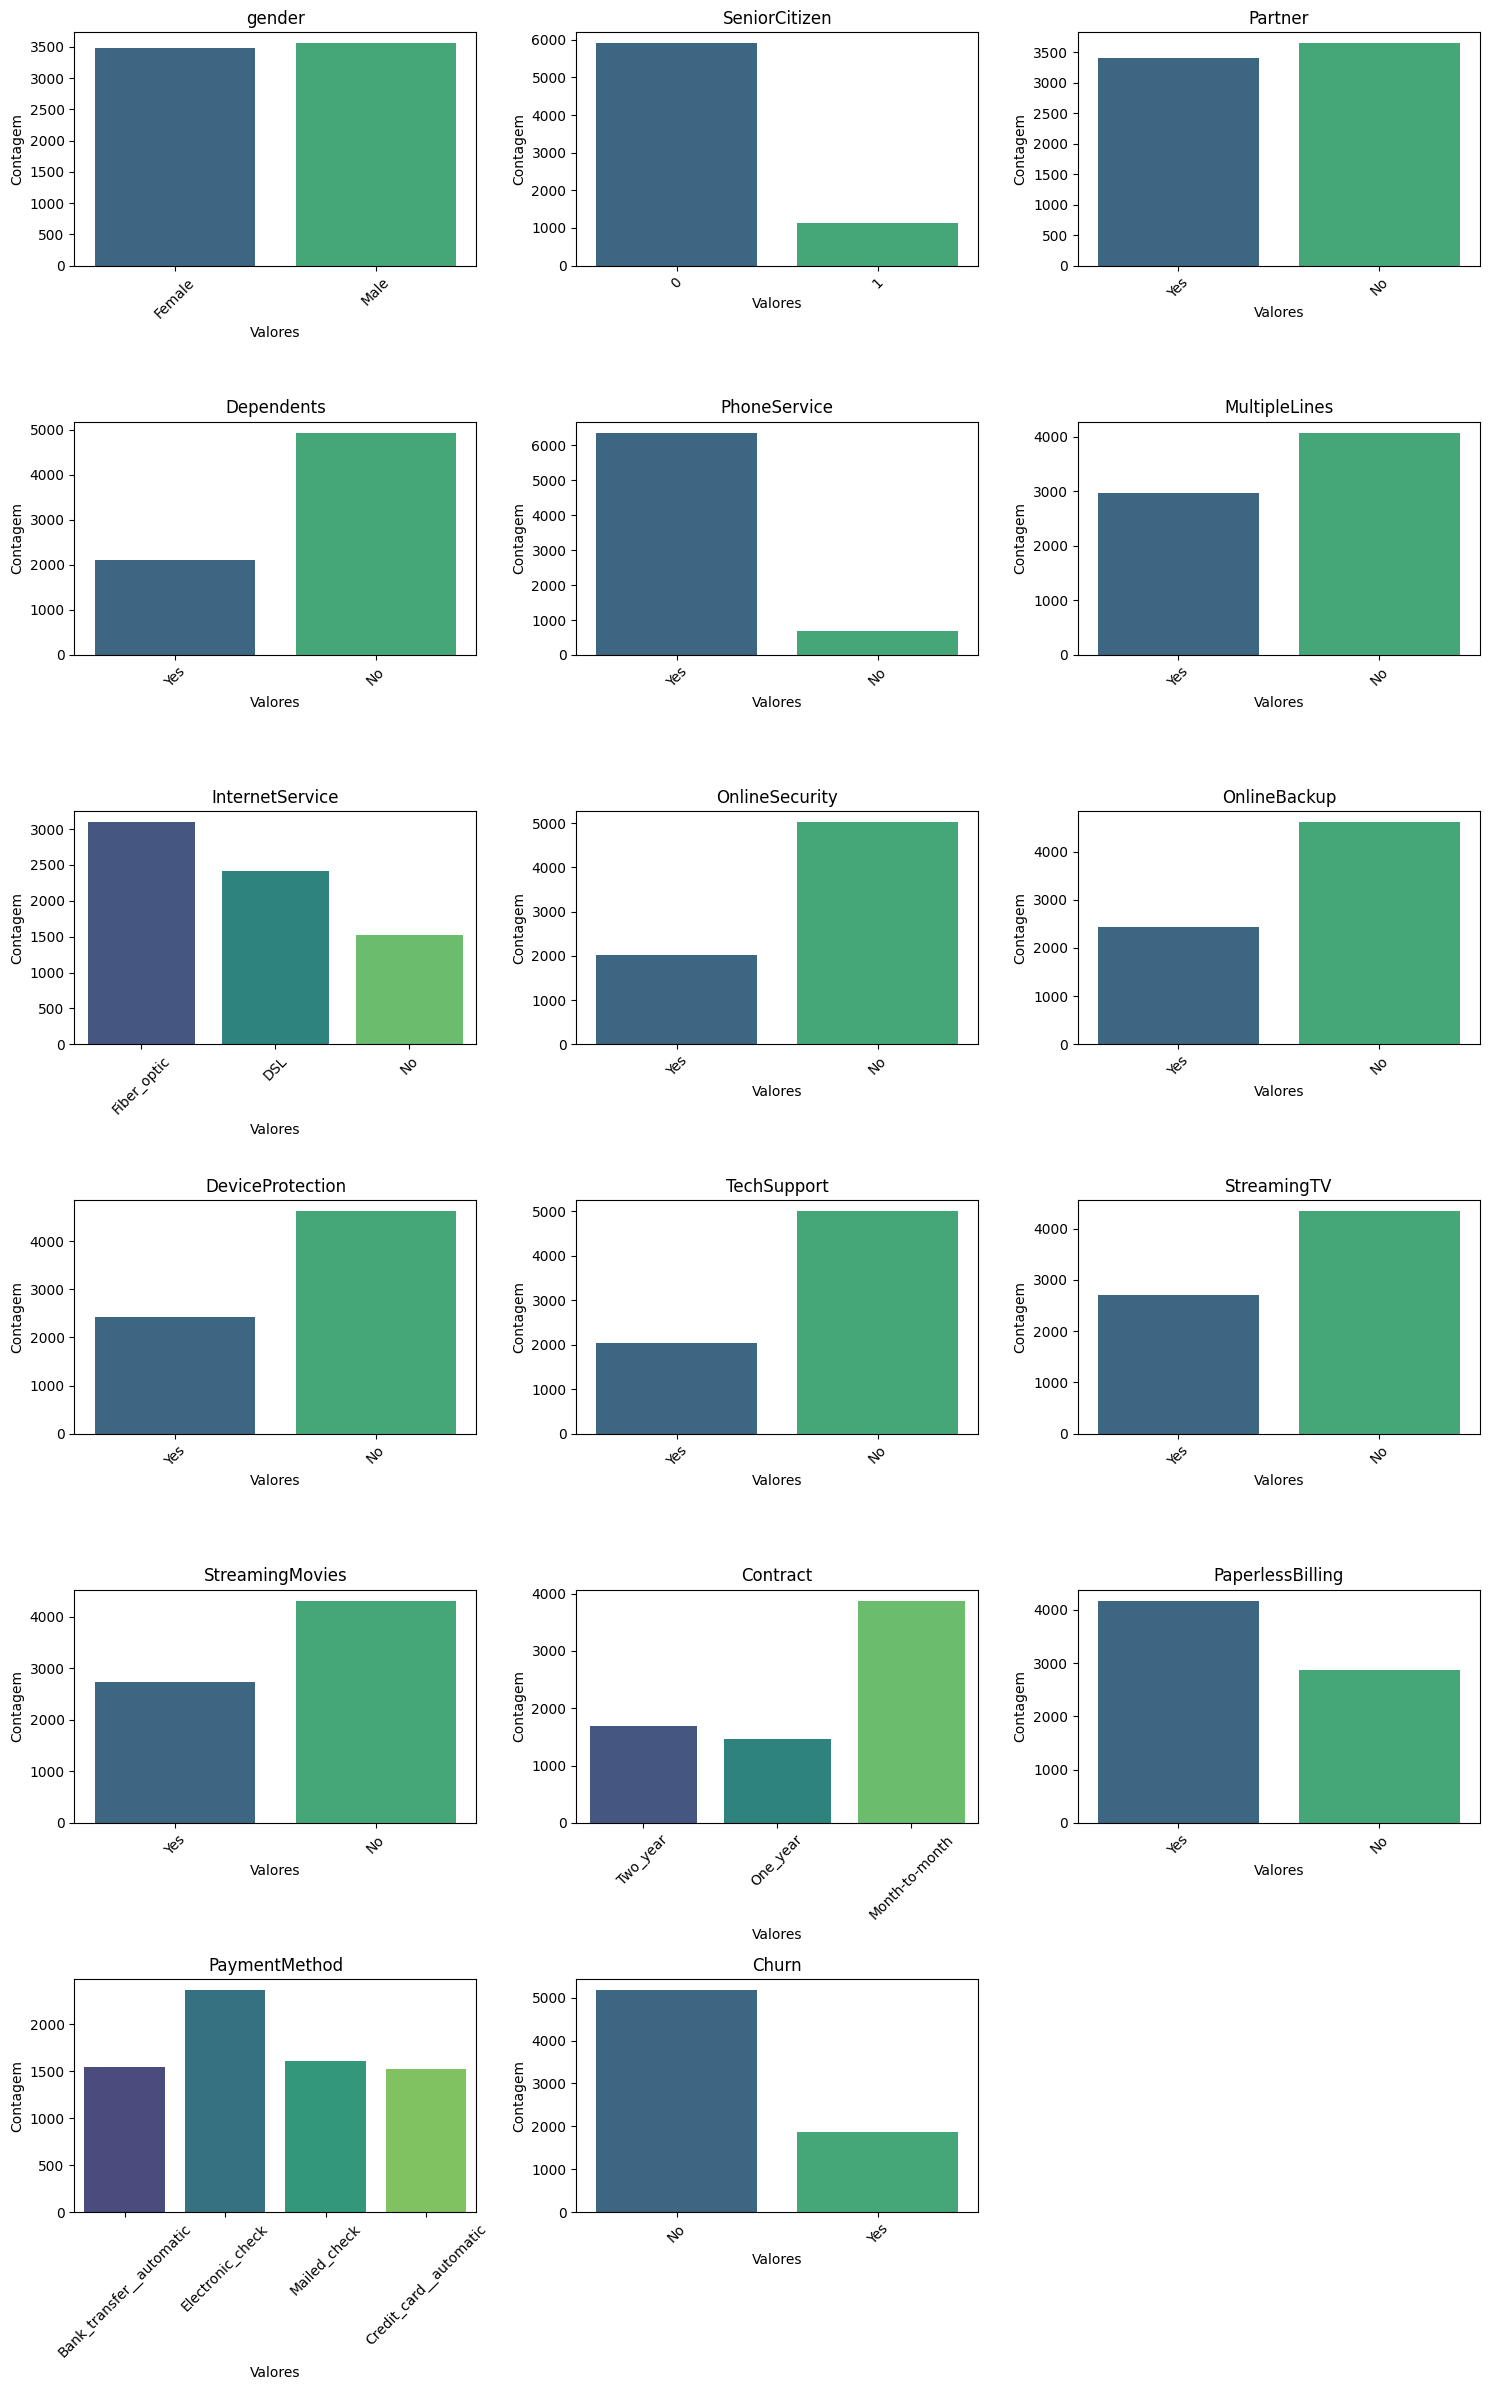

In [17]:
visualizaValoresCategoricos(data_churn_categorica)

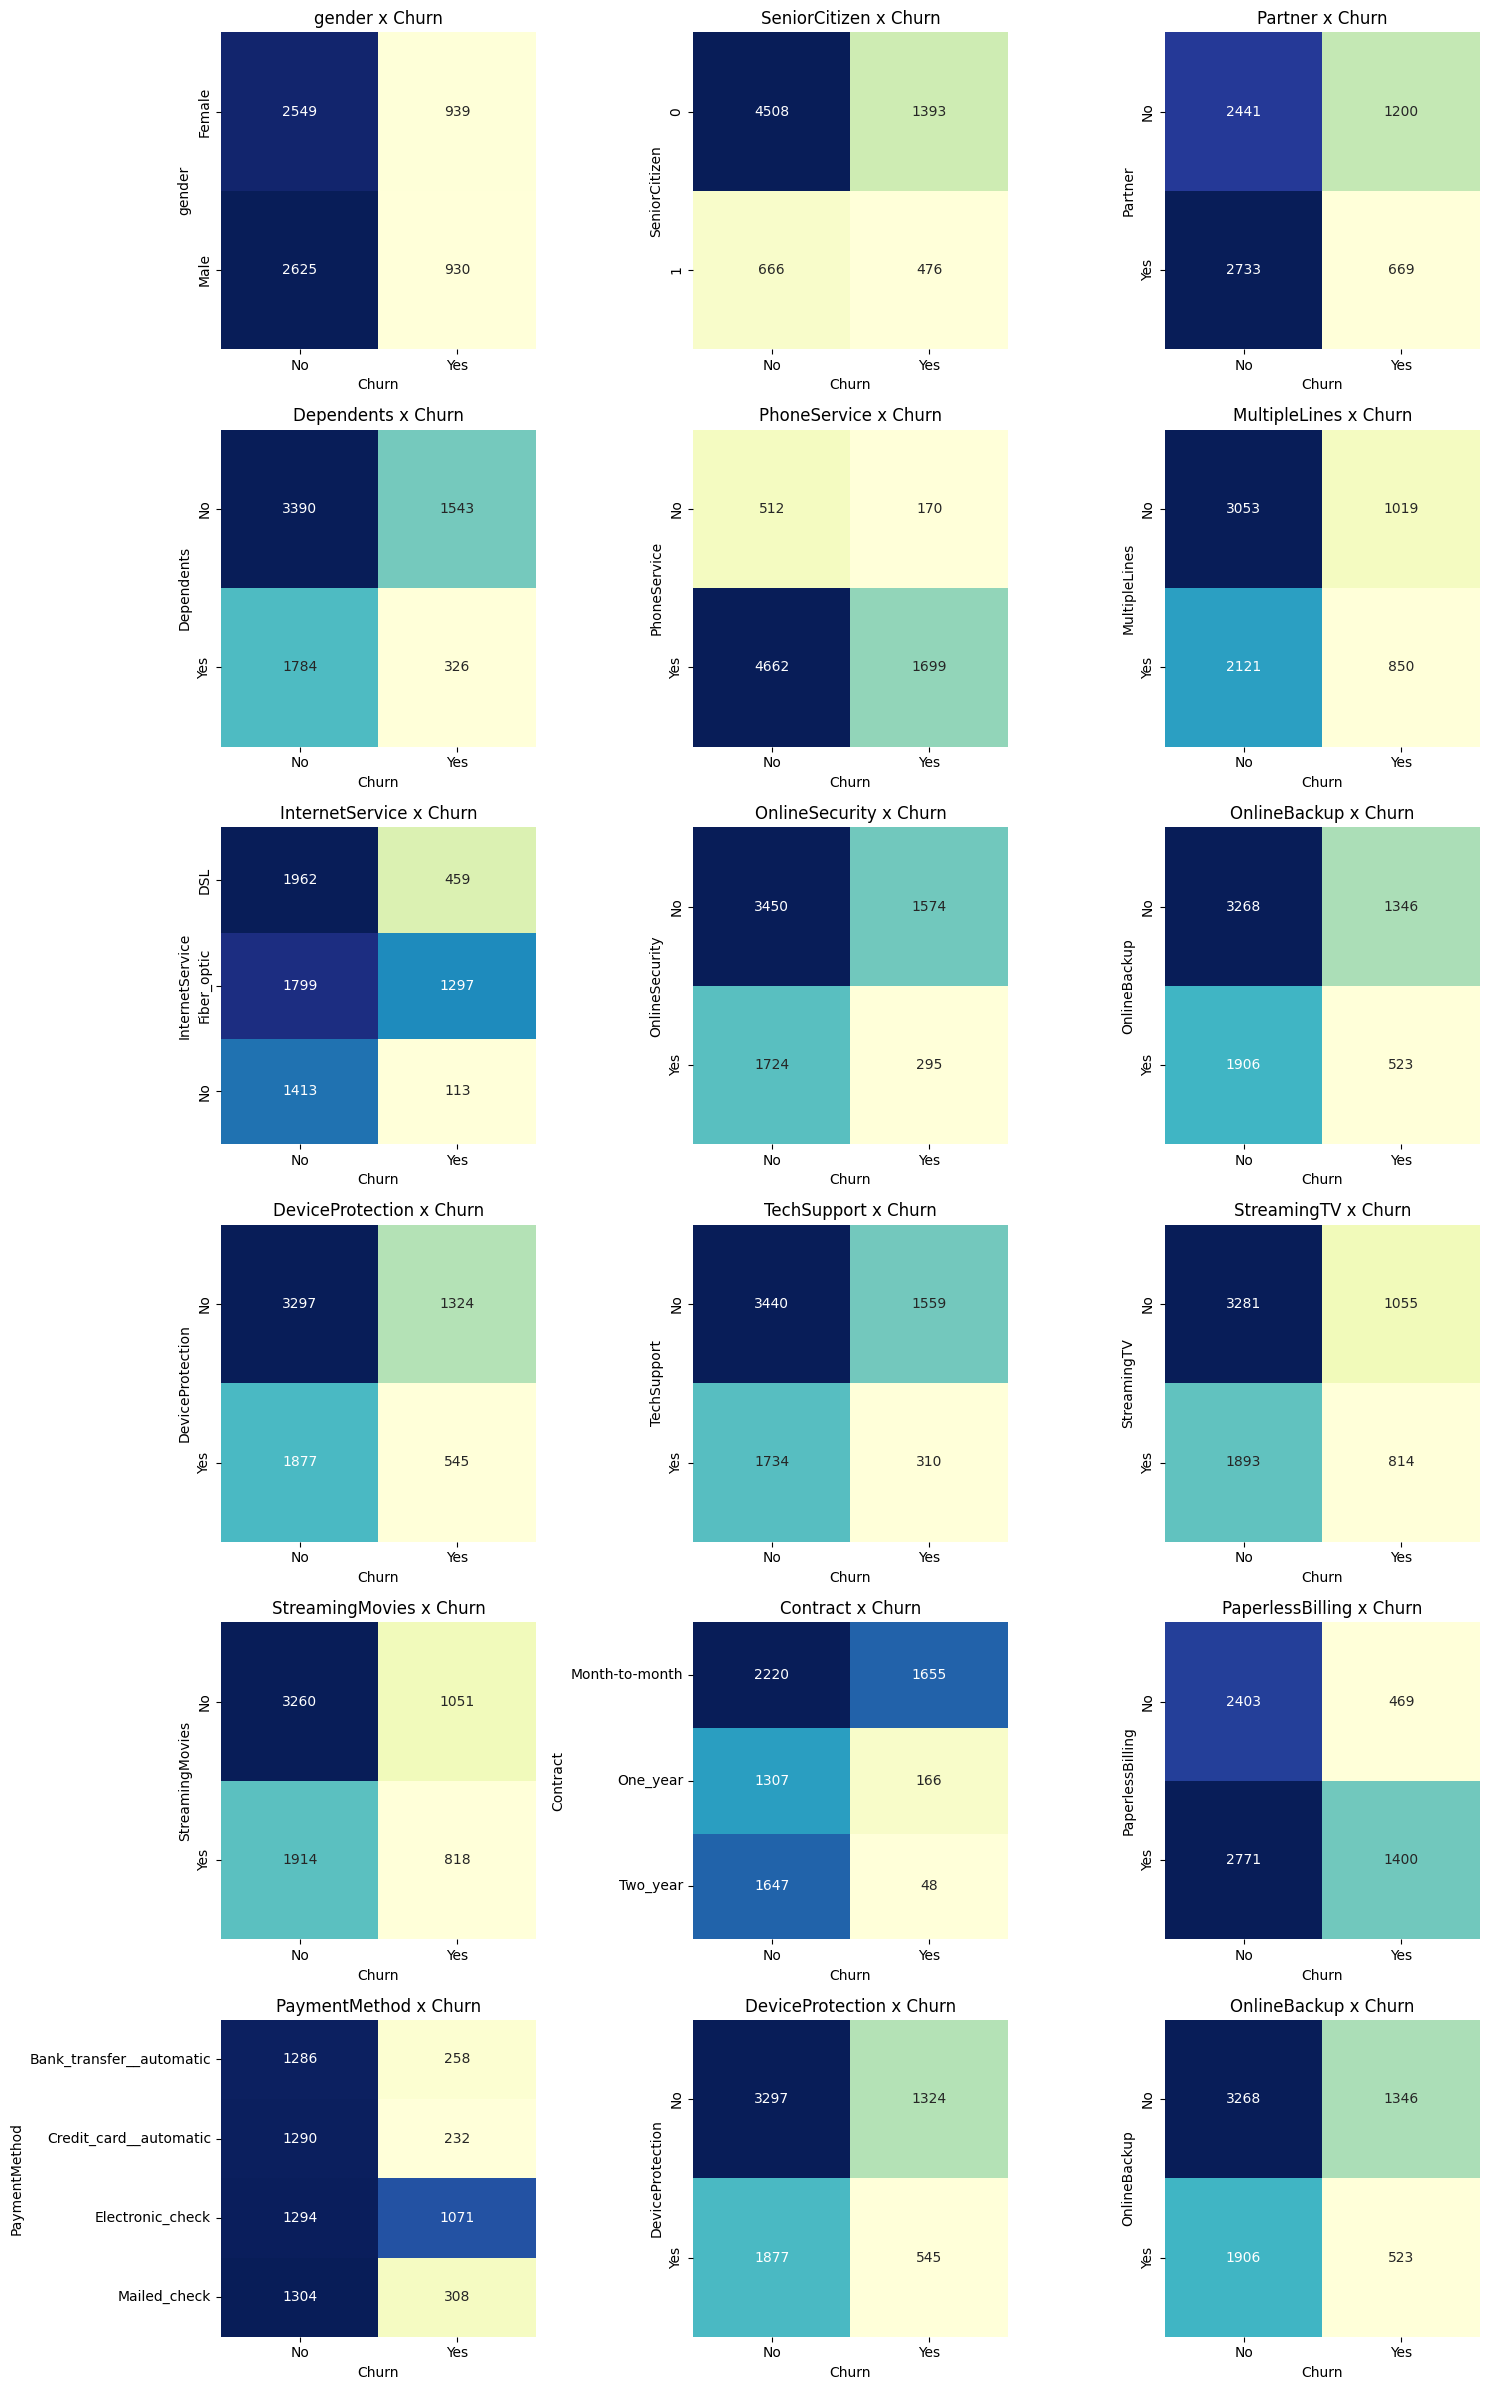

In [20]:
columns_cat_var = ['gender'
               ,'SeniorCitizen'
               ,'Partner'
               ,'Dependents'
               ,'PhoneService'
               ,'MultipleLines'
               ,'InternetService'
               ,'OnlineSecurity'
               ,'OnlineBackup'
               ,'DeviceProtection'
               ,'TechSupport'                        
                ,'StreamingTV'
                ,'StreamingMovies'
                ,'Contract'
                ,'PaperlessBilling'
                ,'PaymentMethod'
                ,'DeviceProtection'
                ,'OnlineBackup']

# Criando Heat Map

createHeatMap(data_churn_
              , columns = columns_cat_var
             , yColumn = 'Churn')

In [21]:
df_chi2 = chi2Analysis(df = data_churn_
                      ,columns = columns_cat_var
                      ,yColumn = 'Churn')

In [22]:
df_chi2

,VARIAVEL,P-VALOR,CORRELACAO
0,gender,0.49,Não
1,SeniorCitizen,0.00,Sim
2,Partner,0.00,Sim
3,Dependents,0.00,Sim
4,PhoneService,0.34,Não
5,MultipleLines,0.00,Sim
6,InternetService,0.00,Sim
7,OnlineSecurity,0.00,Sim
8,OnlineBackup,0.00,Sim
9,DeviceProtection,0.00,Sim


### OBSERVAÇÕES

- Observa-se que todas quase todas as variáveis, a partir do teste de Qui-Quadrado, possuem alguma associação com índice de churn.

## AVALIANDO A INFLUENCIA DE VARIAVEIS CONTINUAS - TOTALCHARGES, MONTHLYCHARGS E TENURE

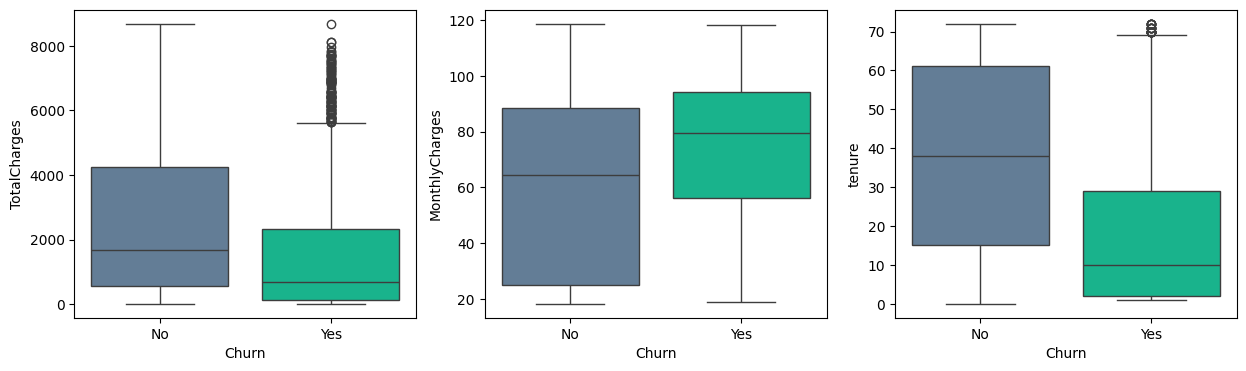

In [47]:
visualizaVariaveisContinuas(data_churn_)

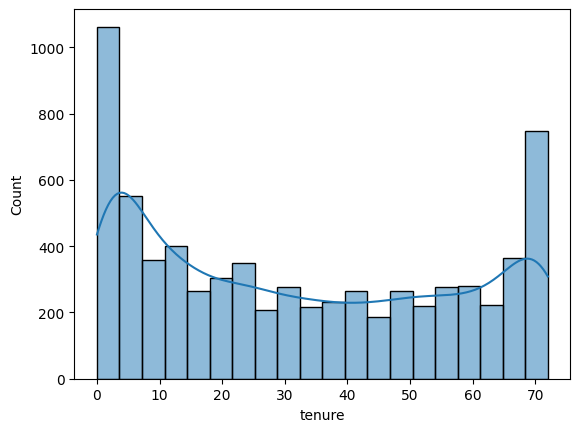

In [49]:
sns.histplot(data=data_churn_, x='tenure', bins=20, kde=True)
plt.show()

## Algumas Associações

### InternetService x MonthlyCharges

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

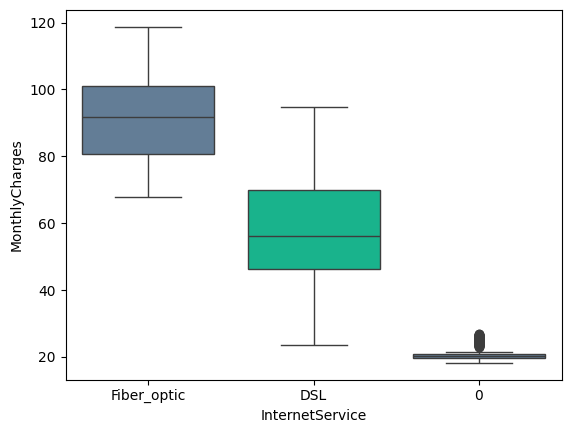

In [23]:
custom_palette = ["#5a7e9e", "#00cc99"]

sns.boxplot(data=data_churn_, x=data_churn_['InternetService'], y=data_churn_['MonthlyCharges'], palette=custom_palette)


### Contrato x MonthlyCharges

<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

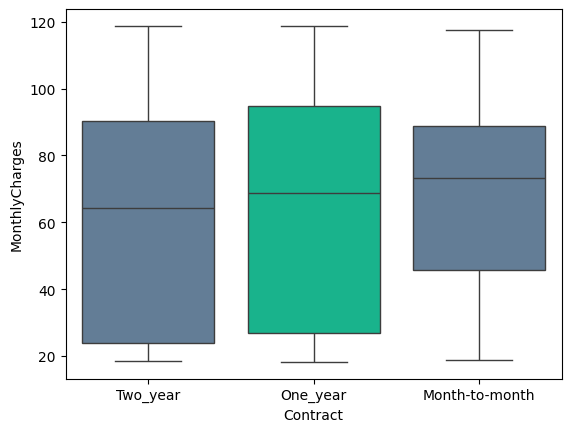

In [24]:
custom_palette = ["#5a7e9e", "#00cc99"]

sns.boxplot(data=data_churn_, x=data_churn_['Contract'], y=data_churn_['MonthlyCharges'], palette=custom_palette)

### PaymentMethod x MonthlyCharges

Text(0.5, 0, 'PaymentMethod')

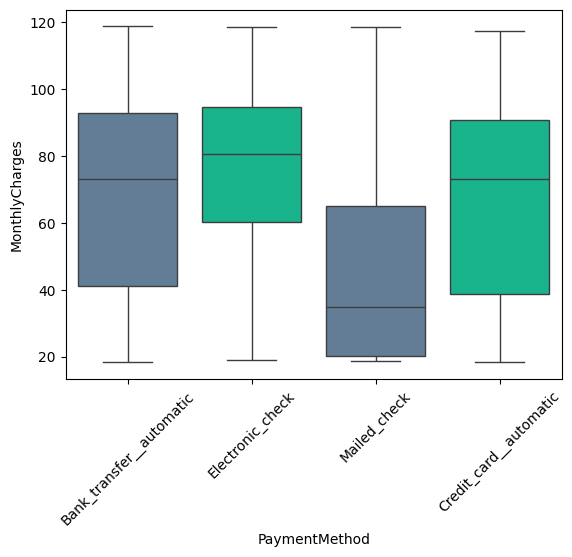

In [30]:
custom_palette = ["#5a7e9e", "#00cc99"]

sns.boxplot(data=data_churn_, x=data_churn_['PaymentMethod'], y=data_churn_['MonthlyCharges'], palette=custom_palette)
plt.xticks(rotation=45)  # Você pode ajustar o ângulo de rotação conforme necessário

# Define rótulos dos eixos
plt.ylabel('MonthlyCharges')
plt.xlabel('PaymentMethod')